custom images steps:

* resized a few
* converted all to jpg
* created zip file with seth-faces/images/ammonX or sethX

**How to copy file to VM**

gcloud compute scp --project "maximal-grin-177817" --zone "us-central1-c" ./seth-faces.zip jupyter@fastai-preemptible:/home/jupyter/

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [7]:
from fastai import *
from fastai.vision import *
from pathlib import Path

In [12]:
# now get my data
path=Path('/home/jupyter/fastai_data/seth-faces')
path_img = path/'images'
path.ls()

[PosixPath('/home/jupyter/fastai_data/seth-faces/images')]

In [15]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/jupyter/fastai_data/seth-faces/images/ammon.10.jpg'),
 PosixPath('/home/jupyter/fastai_data/seth-faces/images/ammon.13.jpg'),
 PosixPath('/home/jupyter/fastai_data/seth-faces/images/seth.18.jpg'),
 PosixPath('/home/jupyter/fastai_data/seth-faces/images/seth.19.jpg'),
 PosixPath('/home/jupyter/fastai_data/seth-faces/images/ammon.07.jpg')]

**To check pattern**

```
pat = r'/([^/.]+).\d+\w*.jpg$'
pat = re.compile(pat)

for s in fnames:
    print(pat.search(str(s)).group(1))
```

In [27]:
np.random.seed(42)
pat = r'/([^/.]+).\d+\w*.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64)

In [28]:
data.normalize(imagenet_stats)

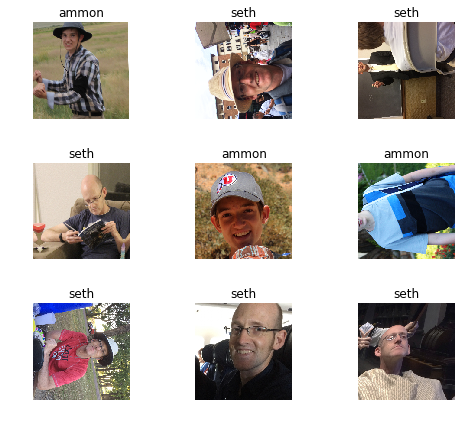

In [34]:
data.show_batch(rows=3, figsize=(7,6))

In [30]:
print(data.classes)
len(data.classes),data.c

['ammon', 'seth']


(2, 2)

In [33]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)
learn.fit_one_cycle(8)

Total time: 01:02
epoch  train_loss  valid_loss  error_rate
1      1.471374    0.618291    0.416667    (00:08)
2      1.269959    0.805275    0.500000    (00:07)
3      0.973657    1.475007    0.666667    (00:07)
4      0.740802    1.935102    0.666667    (00:07)
5      0.598065    2.152022    0.666667    (00:07)
6      0.505325    2.094244    0.583333    (00:07)
7      0.430584    1.957068    0.500000    (00:07)
8      0.373978    1.773956    0.500000    (00:07)

